In [25]:
from tqdm import tqdm
# importing all necessary libraries. Fewer are required for linear models than proper handling of NNs
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.special
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats #used to compute z score and remove outliers
from tqdm import tqdm

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

In [26]:
def compute_y_from_x_cos_simple(X: np.ndarray):
    return np.cos(X * 10)

C:\Users\plogo\AppData\Local\Temp\ipykernel_13040\552038336.py:9: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


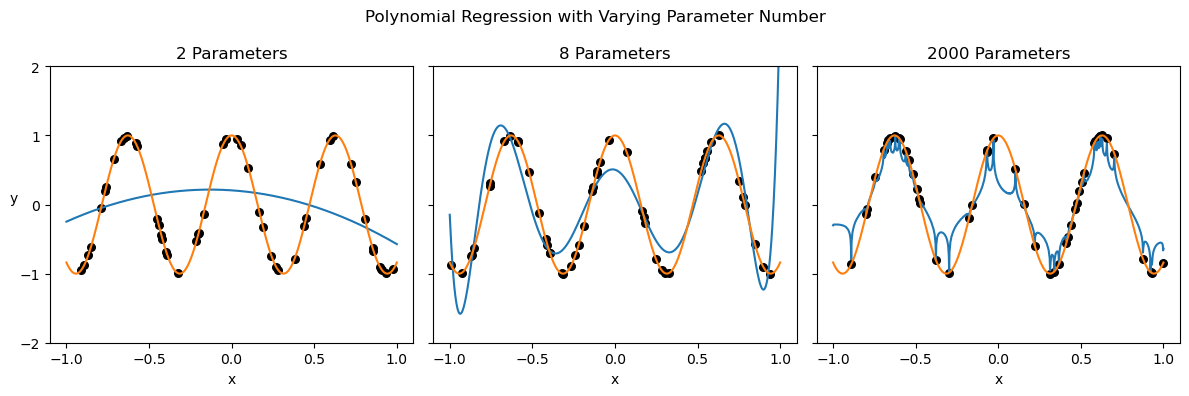

In [34]:
# For making a joint figure of all these under and overparametrised situations together

num_data = 50
num_features_list = [2,8,2000]

# Create sklearn linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)

pd.set_option('mode.use_inf_as_na', True)

def compute_y_from_x_plot(X: np.ndarray):
    return compute_y_from_x_cos_simple(X)

low, high = -1.0, 1.0
mse_list = []
# Generate test data.
X_test = np.linspace(start=low, stop=high, num=1000).reshape(-1, 1)
y_test = compute_y_from_x_plot(X_test)

fig, axs = plt.subplots(1, len(num_features_list), figsize=(12, 4), sharey=True)  # Set the figsize to adjust the width and height of the figure
fig.suptitle('Polynomial Regression with Varying Parameter Number')

for i, ax in enumerate(axs.flatten()):
    num_features = num_features_list[i]

#for num_features in num_features_list:
    
    feature_degrees = 1 + np.arange(num_features).astype(int)
    
    # Sample training data.
    X_train = np.random.uniform(low=low, high=high, size=(num_data, 1))
    y_train = compute_y_from_x_plot(X_train)
    
    # Fit a polynomial regression model.
    X_train_poly = scipy.special.eval_legendre(feature_degrees, X_train)
    X_test_poly = scipy.special.eval_legendre(feature_degrees, X_test)
    beta_hat = np.linalg.pinv(X_train_poly) @ y_train
    y_train_pred = X_train_poly @ beta_hat
    y_test_pred = X_test_poly @ beta_hat
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    mse_list.append(
        {
            "Num. Data": num_data,
            "Num. Parameters (Num Features)": num_features,
            #"repeat_idx": repeat_idx,
            "Train MSE": train_mse,
            "Test MSE": test_mse,
        }
    )
    
    # Plot the polynomial fit data.
    #plt.close()
    ax.plot(X_test[:, 0], y_test_pred, label=f"Polynomial Interpolation with {X_train_poly.shape[1]} Parameters")
    '''
    if i==0:
        ax.plot(X_test[:, 0], y_test, label="True Function, f(x) = cos(10x)")
    else:
        ax.plot(X_test[:, 0], y_test)
    '''
    ax.plot(X_test[:, 0], y_test)
    #ax.scatter(X_train[:, 0], y_train, s=30, color="k", label=f"{num_data} Data Points")
    ax.scatter(X_train[:, 0], y_train, s=30, color="k", label=f"{num_data} Data Points")
    ax.set_xlabel("x")
    if i==0:
        ax.set_ylabel("y", rotation=0)
    ax.set_ylim(-2, 2)
    ax.set_yticks(np.arange(-2, 2.5, 1))
    #ax.legend()
    #plt.show()
    #plt.close()
    ax.set_title(f"{X_train_poly.shape[1]} Parameters")


plt.tight_layout()  # Adjust the spacing between subplots
#plt.legend()  # Show the legend
plt.show()
